In [1]:
print('ritu')

ritu


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [109]:
X,y = make_blobs(random_state = 23,centers = 6,n_samples = 20000,n_features = 2)

In [110]:
df = pd.DataFrame(X,columns = ['xa','xb'])
df

,xa,xb
0,-0.159147,10.315006
1,-11.443932,8.715086
2,-4.789931,4.946546
3,6.678149,-2.275517
4,-8.300440,-3.046473
...,...,...
19995,-5.699780,-2.284114
19996,-7.978233,-0.858002
19997,-7.865613,-3.972231
19998,-5.477998,3.825670


In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16000, 2)
(4000, 2)
(16000,)
(4000,)


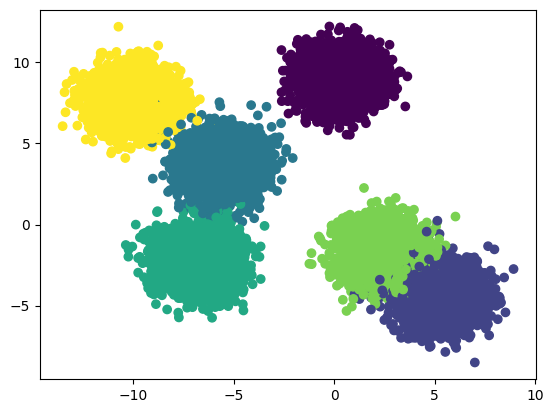

In [113]:
plt.scatter(df['xa'],df.xb,c = y)

In [114]:
model = KMeans(n_clusters = 3, init = 'k-means++')
model.fit_predict(X_train)

array([0, 0, 2, ..., 1, 2, 0])

In [115]:
import warnings
warnings.filterwarnings('ignore')
wcss = []

for i in range(1,11):
    model = KMeans(n_clusters = i, init = 'k-means++')
    model.fit(X_train)
    wcss.append(model.inertia_)
wcss


[910639.04061811,
 398218.93164826406,
 210525.6546233303,
 98557.22692687846,
 77874.89209225148,
 31355.70400513085,
 29585.89919831617,
 27930.609017672363,
 26562.728944115257,
 24492.41160285994]

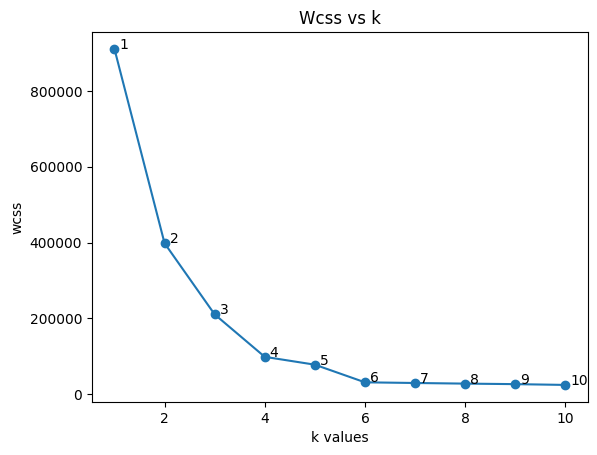

In [116]:
plt.plot(range(1,11),wcss,marker = 'o')
plt.title('Wcss vs k')
plt.xlabel('k values')
plt.ylabel('wcss')
for i in range(1,11):
    plt.annotate(i, xy= (i+.1,wcss[i-1]+500))
plt.show()

In [117]:
model = KMeans(n_clusters = 3,init = 'k-means++')

y_pred = model.fit_predict(X_train)
y_pred

array([0, 0, 2, ..., 1, 2, 0])

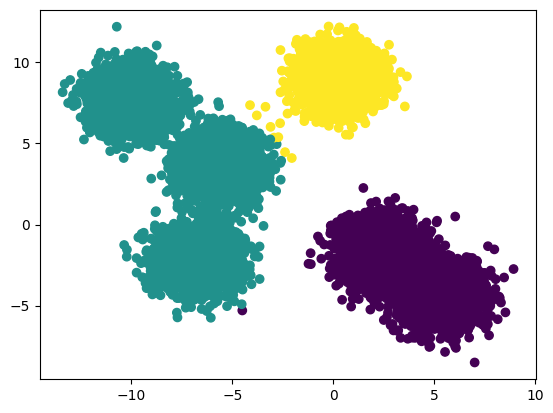

In [118]:
plt.scatter(X_train[:,0],X_train[:,1],c= y_pred)

In [119]:
centroid = model.cluster_centers_
centroid

array([[ 3.83989611, -3.05976843],
       [-7.39774884,  3.04772205],
       [ 0.28986802,  8.92163784]])

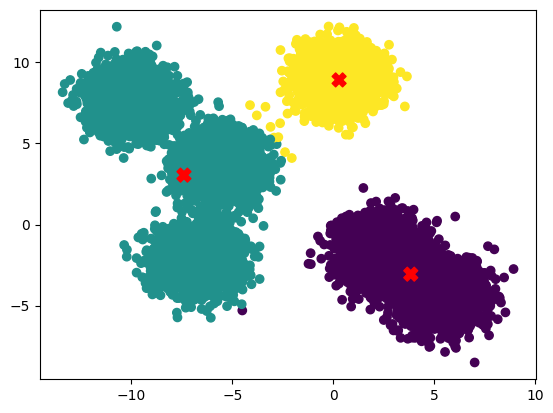

In [120]:
plt.scatter(X_train[:,0],X_train[:,1],c= y_pred)
plt.scatter(centroid[:,0],centroid[:,1],marker = 'X',c='r',s = [100]*3)

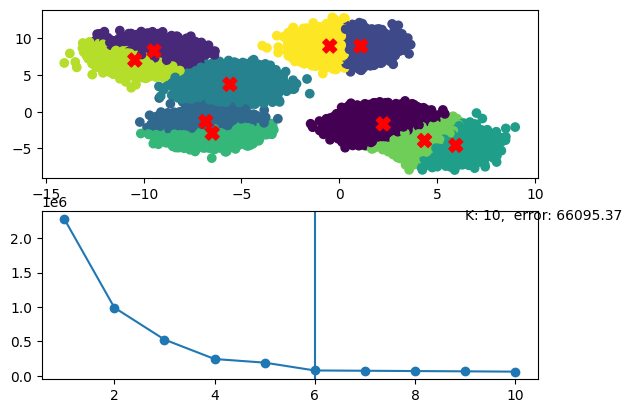

In [128]:
X,y = make_blobs(random_state = 23,centers = 6,n_samples = 50000,n_features = 2)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

import time 
wcss = [1]
min,best = float('inf'),0
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    y_pred = model.fit_predict(X_train)
    wcss.append(model.inertia_)

    plt.subplot(2,1,1)
    plt.scatter(X_train[:,0],X_train[:,1],c=y_pred)
    centroied = model.cluster_centers_
    plt.scatter(centroied[:,0],centroied[:,1],marker = 'X',c='r',s=[100]*i)

    plt.subplot(2,1,2)
    plt.plot(range(1,i+1),wcss[1:],marker = 'o',)

    plt.annotate(text = f'K: {i},  error: {round(wcss[i-1],2)}',xy =(i-1,wcss[1]-4000) )
    if wcss[i]**2/wcss[i-1]<min:
        min = wcss[i]**2/wcss[i-1]
        best = i
    plt.axvline(best)
    plt.show()
    display(clear = True)
    # print('ritu ', 'first ',wcss[i-1],'second ',wcss[i], '// ',wcss[i]/wcss[i-1],'i', i)
    time.sleep(1)

In [126]:
# kjlghjvghvhkj